In [ ]:
from google.colab import files
uploaded = files.upload()


Saving labels.csv to labels.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import cv2
import tensorflow as tf
from tensorflow import keras
from keras import layers
from functools import partial

import warnings
warnings.filterwarnings('ignore')
AUTO = tf.data.experimental.AUTOTUNE

In [ ]:
# from zipfile import ZipFile
# data_path = 'dog-breed-identification.zip'

# with ZipFile(data_path, 'r') as zip:
# 	zip.extractall()
# 	print('The data set has been extracted.')

In [ ]:
df = pd.read_csv('labels.csv')
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
df.shape

(10222, 2)

In [ ]:
df['breed'].nunique()

120

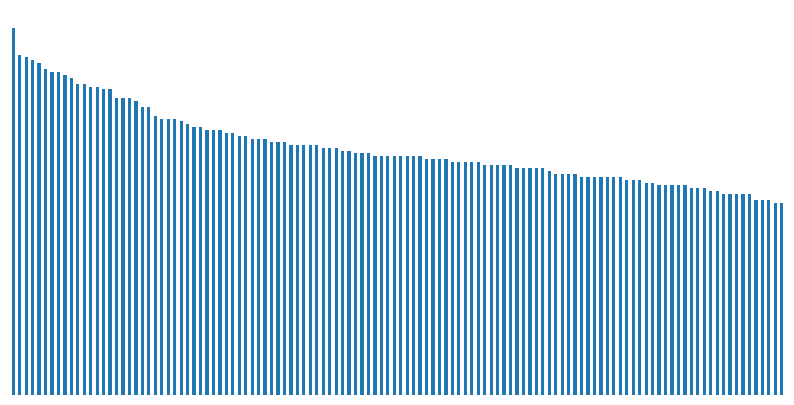

In [ ]:
plt.figure(figsize=(10, 5))
df['breed'].value_counts().plot.bar()
plt.axis('off')
plt.show()

In [ ]:
df['filepath'] = 'train/' + df['id'] + '.jpg'
df.head()

,id,breed,filepath
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,train/000bec180eb18c7604dcecc8fe0dba07.jpg
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,train/001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,001cdf01b096e06d78e9e5112d419397,pekinese,train/001cdf01b096e06d78e9e5112d419397.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,train/00214f311d5d2247d5dfe4fe24b2303d.jpg
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,train/0021f9ceb3235effd7fcde7f7538ed62.jpg


File not found: train/261ee1f32174c1ce20aa3ae952f5604e.jpg
File not found: train/228e7403fbfab41c7586de3afb83887b.jpg
File not found: train/f220628a83618e6cc13e78361e833361.jpg
File not found: train/5f14fac852ee51524997243f086e4ea2.jpg
File not found: train/aee6daee7cf47f6daa6ee98c4ceb15a0.jpg
File not found: train/ac8869ca8acc2334a3e034c4ad8d0b68.jpg
File not found: train/e96a5909f47824c1410fd00e3bc23f4d.jpg
File not found: train/417efae72babc6847bc551654d339ecd.jpg
File not found: train/37efdfba2aa0194dbf6a553dd53607df.jpg
File not found: train/20bf4cd949afa66f38a99b9c815a1102.jpg
File not found: train/c080a6d7d5bdba6e23c0f854a67493ad.jpg
File not found: train/c4a70cc9be80f67614e4cb0a756f28a5.jpg


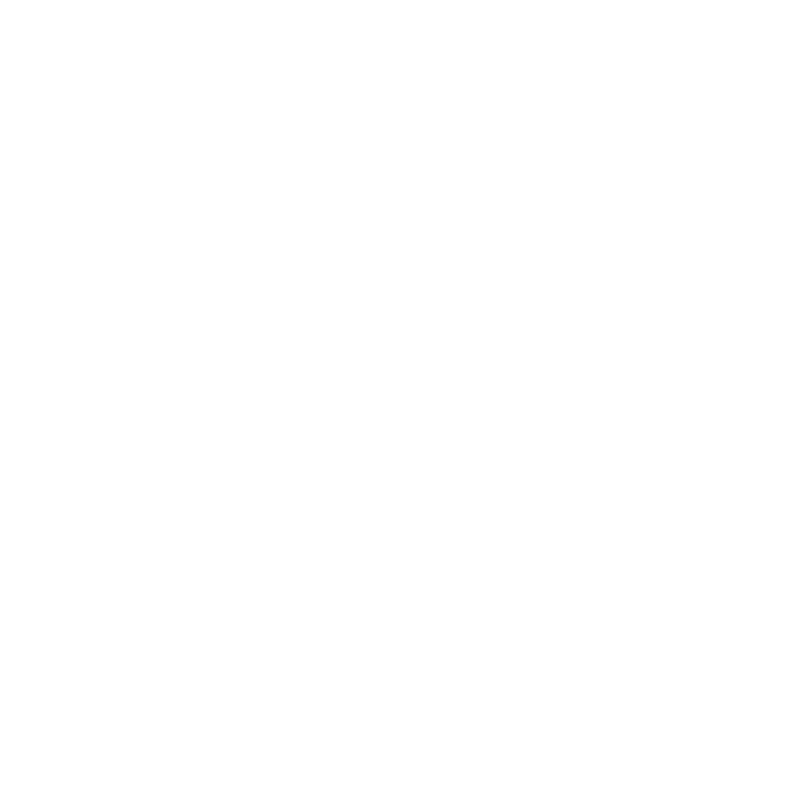

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.subplots(figsize=(10, 10))
for i in range(12):
    plt.subplot(4, 3, i+1)

    # Selecting a random image index from the dataframe
    k = np.random.randint(0, len(df))
    img_path = df.loc[k, 'filepath']

    # Check if the file path exists
    if os.path.exists(img_path):
        img = cv2.imread(img_path)

        # Check if the image was loaded correctly
        if img is not None:
            # Convert from BGR (OpenCV) to RGB (matplotlib)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img_rgb)
            plt.title(df.loc[k, 'breed'])
            plt.axis('off')
        else:
            print(f"Error loading image at {img_path}")
            plt.axis('off')  # Ensure layout is still maintained
    else:
        print(f"File not found: {img_path}")
        plt.axis('off')

plt.show()


In [ ]:
le = LabelEncoder()
df['breed'] = le.fit_transform(df['breed'])
df.head()

,id,breed,filepath
0,000bec180eb18c7604dcecc8fe0dba07,19,train/000bec180eb18c7604dcecc8fe0dba07.jpg
1,001513dfcb2ffafc82cccf4d8bbaba97,37,train/001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,001cdf01b096e06d78e9e5112d419397,85,train/001cdf01b096e06d78e9e5112d419397.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,15,train/00214f311d5d2247d5dfe4fe24b2303d.jpg
4,0021f9ceb3235effd7fcde7f7538ed62,49,train/0021f9ceb3235effd7fcde7f7538ed62.jpg


In [ ]:
features = df['filepath']
target = df['breed']

X_train, X_val,	Y_train, Y_val = train_test_split(features, target,
									test_size=0.15,
									random_state=10)

X_train.shape, X_val.shape


((8688,), (1534,))

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Use a try-except block to handle potential errors
try:
    img = cv2.imread('/content/nine-dogs-in-grassy-field.jpg')

    if img is not None:
        # Convert from BGR to RGB for matplotlib
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.show()
    else:
        print("Image not loaded correctly. Check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

Image not loaded correctly. Check the file path.


In [ ]:
augments = [A.VerticalFlip(p=1), A.HorizontalFlip(p=1),
            A.CoarseDropout(p=1), A.CLAHE(p=1)]

plt.subplots(figsize=(10, 10))
for i, aug in enumerate(augments):
    plt.subplot(2, 2, i+1)
    aug_img = aug(image=img)['image']
    plt.imshow(aug_img)
plt.show()


NameError: name 'A' is not defined

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import cv2
import tensorflow as tf
from tensorflow import keras
from keras import layers
from functools import partial

import warnings
warnings.filterwarnings('ignore')
AUTO = tf.data.experimental.AUTOTUNE


In [ ]:
from zipfile import ZipFile
data_path = '/content/archive (2).zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted.')


The data set has been extracted.


In [ ]:
df = pd.read_csv('/content/labels.csv')
df.head()


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
df.shape


(10222, 2)

In [ ]:
df['breed'].nunique()

120

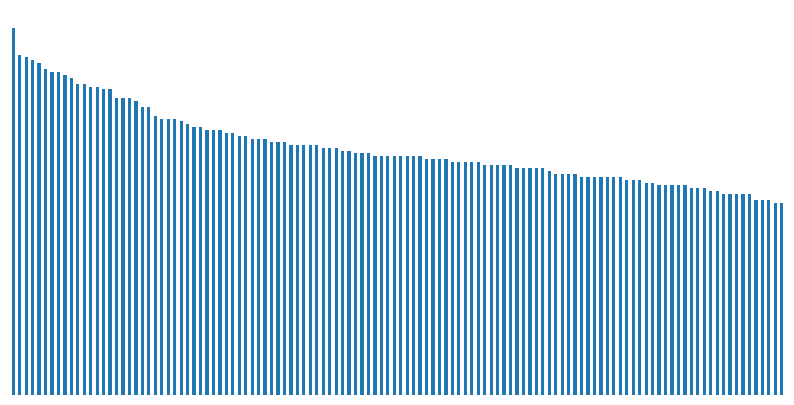

In [ ]:
plt.figure(figsize=(10, 5))
df['breed'].value_counts().plot.bar()
plt.axis('off')
plt.show()

In [ ]:
df['filepath'] = '/content/train' + df['id'] + '.jpg'
df.head()

,id,breed,filepath
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,/content/train000bec180eb18c7604dcecc8fe0dba07...
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,/content/train001513dfcb2ffafc82cccf4d8bbaba97...
2,001cdf01b096e06d78e9e5112d419397,pekinese,/content/train001cdf01b096e06d78e9e5112d419397...
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,/content/train00214f311d5d2247d5dfe4fe24b2303d...
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,/content/train0021f9ceb3235effd7fcde7f7538ed62...


Error loading image at /content/train40c0f49c7c2bc937ff640093a4c7b06d.jpg
Error loading image at /content/train6192909376bd28cd7b82ced40acf3330.jpg
Error loading image at /content/trainb7123d5d7de79459bb6a1f62fafd7ed8.jpg
Error loading image at /content/train5c3e2e9b132c7297e6e0115a886b4fff.jpg
Error loading image at /content/train80cf916b258d8cf15395c80f0616127d.jpg
Error loading image at /content/traincbc3a36f42d9c1a97577354bcde3716d.jpg
Error loading image at /content/train6a6e90b821c64c6ff66d548086843ab1.jpg
Error loading image at /content/train597956ee823df91efbb2726b15b059c6.jpg
Error loading image at /content/trainfeb9d0ae525ca28aabff74b455e34c16.jpg
Error loading image at /content/trainfd80cac3ffdcd6ddcfe4d2d6f8f617f2.jpg
Error loading image at /content/traincdb32ac86d0475b5d32667582acaf267.jpg
Error loading image at /content/traind9e02a65ba3b640f29e3e0bbf9a70ecc.jpg


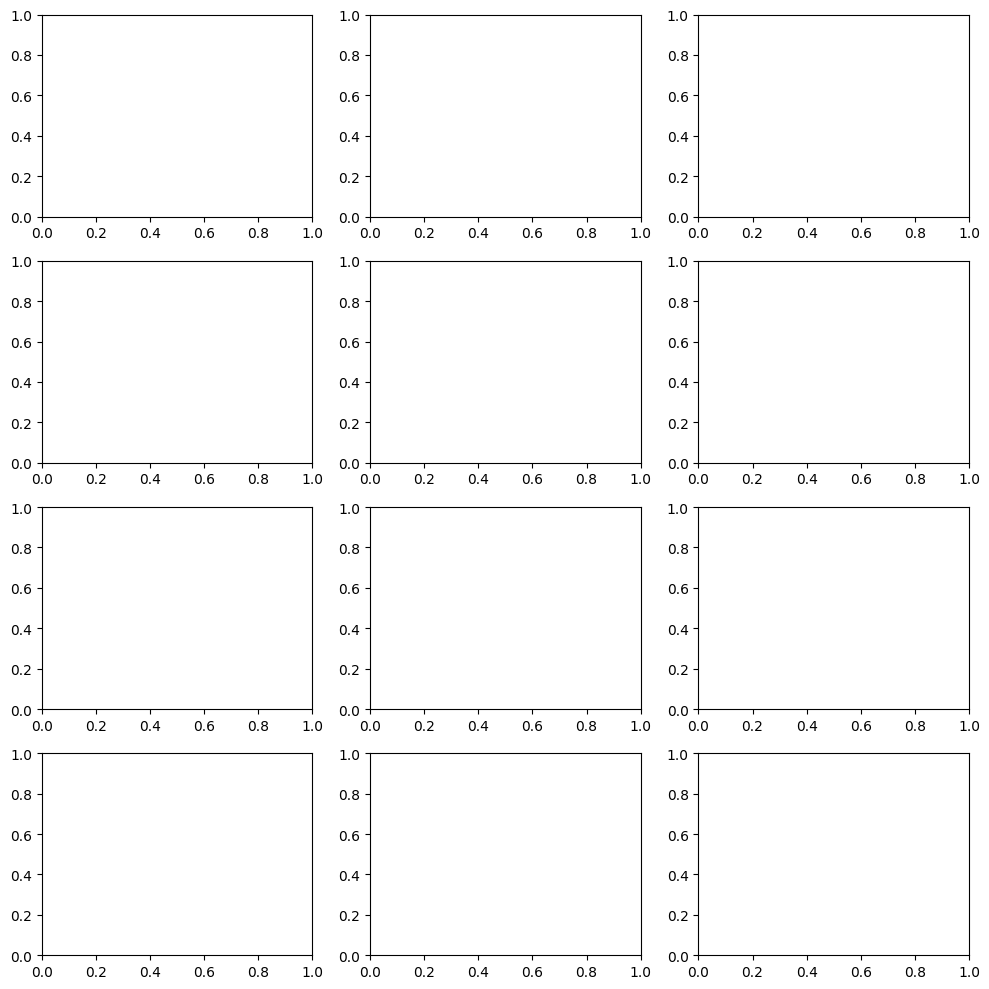

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Adjust the figure size for subplots
plt.figure(figsize=(10, 10))

# Loop through 12 subplots (4 rows x 3 columns)
for i in range(12):
    plt.subplot(4, 3, i+1)

    # Selecting a random index from the dataframe
    k = np.random.randint(0, len(df))

    # Read the image using cv2
    img = cv2.imread(df.loc[k, 'filepath'])

    # Check if the image was successfully loaded
    if img is not None:
        # Convert BGR to RGB for displaying in matplotlib
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Display the image
        plt.imshow(img)
        plt.title(df.loc[k, 'breed'])
        plt.axis('off')  # Turn off the axis ticks
    else:
        print(f"Error loading image at {df.loc[k, 'filepath']}")

# Display the entire grid of subplots
plt.tight_layout()
plt.show()


In [ ]:
le = LabelEncoder()
df['breed'] = le.fit_transform(df['breed'])
df.head()

,id,breed,filepath
0,000bec180eb18c7604dcecc8fe0dba07,19,/content/train000bec180eb18c7604dcecc8fe0dba07...
1,001513dfcb2ffafc82cccf4d8bbaba97,37,/content/train001513dfcb2ffafc82cccf4d8bbaba97...
2,001cdf01b096e06d78e9e5112d419397,85,/content/train001cdf01b096e06d78e9e5112d419397...
3,00214f311d5d2247d5dfe4fe24b2303d,15,/content/train00214f311d5d2247d5dfe4fe24b2303d...
4,0021f9ceb3235effd7fcde7f7538ed62,49,/content/train0021f9ceb3235effd7fcde7f7538ed62...


In [ ]:
features = df['filepath']
target = df['breed']

X_train, X_val, Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.15,
                                      random_state=10)

X_train.shape, X_val.shape

((8688,), (1534,))

In [ ]:
import albumentations as A

transforms_train = A.Compose([
    A.VerticalFlip(p=0.2),
    A.HorizontalFlip(p=0.7),
    A.CoarseDropout(p=0.5),
    A.RandomGamma(p=0.5),
    A.RandomBrightnessContrast(p=1)
])


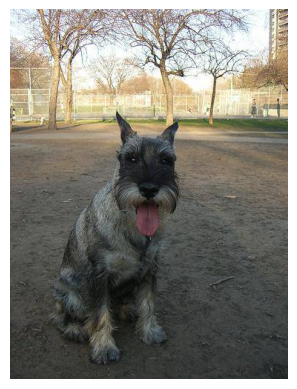

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image using OpenCV
img = cv2.imread('/content/0246f44bb123ce3f91c939861eb97fb7.jpg')

# Check if the image was loaded correctly
if img is not None:
    # Convert the image from BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axis ticks
    plt.show()
else:
    print("Error: Could not load image.")


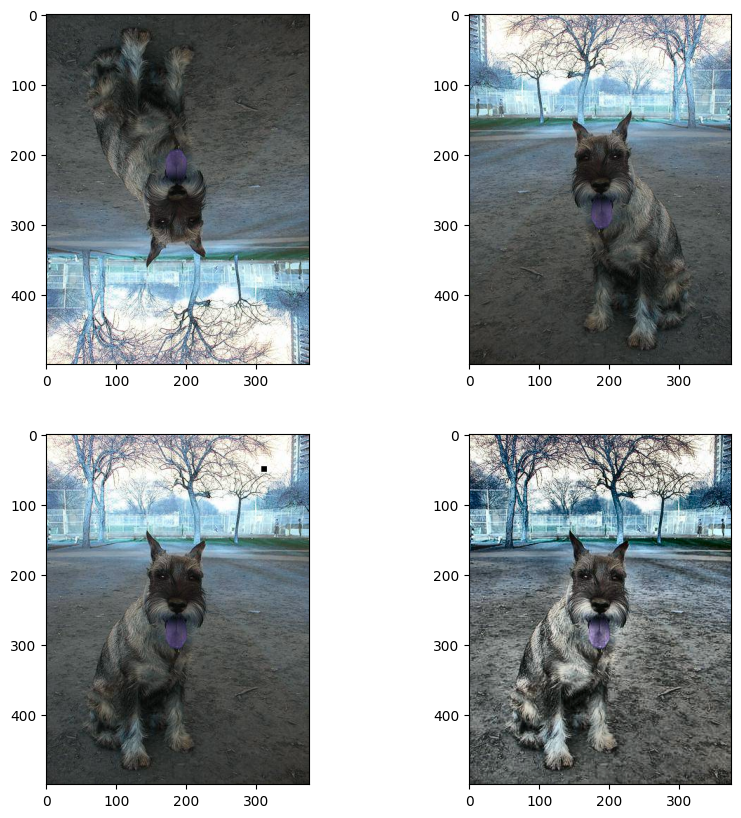

In [ ]:
augments = [A.VerticalFlip(p=1), A.HorizontalFlip(p=1),
            A.CoarseDropout(p=1), A.CLAHE(p=1)]

plt.subplots(figsize=(10, 10))
for i, aug in enumerate(augments):
    plt.subplot(2, 2, i+1)
    aug_img = aug(image=img)['image']
    plt.imshow(aug_img)
plt.show()


In [ ]:
def aug_fn(img):
    aug_data = transforms_train(image=img)
    aug_img = aug_data['image']

    return aug_img


@tf.function
def process_data(img, label):
    aug_img = tf.numpy_function(aug_fn,
                                [img],
                                Tout=tf.float32)

    return img, label


def decode_image(filepath, label=None):

    img = tf.io.read_file(filepath)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [128, 128])
    img = tf.cast(img, tf.float32) / 255.0

    if label == None:
        return img

    return img, tf.one_hot(indices=label,
                           depth=120,
                           dtype=tf.float32)


In [ ]:
train_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_train, Y_train))
    .map(decode_image, num_parallel_calls=AUTO)
    .map(partial(process_data), num_parallel_calls=AUTO)
    .batch(32)
    .prefetch(AUTO)
)

val_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_val, Y_val))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(32)
    .prefetch(AUTO)
)


In [ ]:
for img, label in train_ds.take(1):
  print(img.shape, label.shape)

Found 0 files belonging to 0 classes.


ValueError: No images found in directory train. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')